<a href="https://colab.research.google.com/github/Ibnuamrithaher/Deep-Learning/blob/main/15%20-%20Transfer%20Learning/Part%203%20-%20Transfer%20Learning%20with%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install "jcopdl==1.1.1"

In [10]:
!unzip "data.zip"

Archive:  data.zip
   creating: data/
  inflating: data/test_label.csv     
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/test/
  inflating: data/test/1409.jpg      
   creating: __MACOSX/data/test/
  inflating: __MACOSX/data/test/._1409.jpg  
  inflating: data/test/1347.jpg      
  inflating: __MACOSX/data/test/._1347.jpg  
  inflating: data/test/1145.jpg      
  inflating: __MACOSX/data/test/._1145.jpg  
  inflating: data/test/360.jpg       
  inflating: __MACOSX/data/test/._360.jpg  
  inflating: data/test/1192.jpg      
  inflating: __MACOSX/data/test/._1192.jpg  
  inflating: data/test/374.jpg       
  inflating: __MACOSX/data/test/._374.jpg  
  inflating: data/test/1964.jpg      
  inflating: __MACOSX/data/test/._1964.jpg  
  inflating: data/test/1958.jpg      
  inflating: __MACOSX/data/test/._1958.jpg  
  inflating: data/test/572.jpg       
  inflating: __MACOSX/data/test/._572

In [4]:
!gdown https://drive.google.com/file/d/1HpdhtsujXtJ0dJple-siaEU-s31GgnvT/view?usp=sharing

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1HpdhtsujXtJ0dJple-siaEU-s31GgnvT
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1HpdhtsujXtJ0dJple-siaEU-s31GgnvT/view?usp=sharing
To: /content/view?usp=sharing
93.4kB [00:00, 2.82MB/s]


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from jcopdl.utils.dataloader import MultilabelDataset

In [73]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

https://pytorch.org/hub/pytorch_vision_mobilenet_v2/


Referensi mobilenetv2
https://medium.com/towards-data-science/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c

# Dataset & Dataloader

In [74]:
# Image Folder Dataset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [75]:
bs = 64  # batch size
crop_size = 224  # crop size

train_transform = transforms.Compose([
    transforms.RandomRotation(10),  # tambahkan transformasi yang dibutuhkan
    transforms.RandomResizedCrop(crop_size, scale=(0.7,1)),
    transforms.
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(230),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = MultilabelDataset("data/train_label.csv","data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=0)

test_set = MultilabelDataset("data/test_label.csv","data/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [76]:
label2cat = train_set.classes

# Arstiektur & Config

Contoh cara pakai pretrained-model

In [77]:
from torchvision.models  import mobilenet_v2

In [78]:
mnet = mobilenet_v2(pretrained=True)

for param in mnet.parameters():
  param.requires_grad = False

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [79]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [80]:
mnet.classifier = nn.Sequential(
    nn.Linear(1200, 5),
    nn.Sigmoid()
)

In [81]:
# Template Dasar
class CustomMobilenetV2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(pretrained=True)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.mnet(x)

    def freeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = True

    def unfreeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = True

In [82]:
config = set_config({
    "output_size": len(train_set.classes),
    "batch_size": bs,
    "crop_size": crop_size,
})

## Phase 1: Adaptation (lr standard + patience kecil)

In [83]:
model = CustomMobilenetV2(config.output_size).to(device)  # model yang sudah dibuat
criterion = nn.BCELoss()  # loss function
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config,early_stop_patience=2, outdir="model")

In [ ]:
# Standard Loop
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost

In [ ]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Phase 2: Fine-tuning(lr dikecilin, patience ditambah)

In [ ]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

callback.reset_early_stop()
callback.early_stop_patience = 5

In [ ]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Predict

In [84]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = (output > 0.5).to(torch.float32)
preds

tensor([[0., 1., 1., 1., 1.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 1., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1.],
        [1., 1., 0., 0., 0.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 0., 1., 0., 1.],
        [1., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1.],
        [0

# Sanity Check

In [85]:
def convert_to_label(x):
  return [label for pred, label in zip(x, label2cat) if pred == 1]

def inverse_norm(img):
  img[0,:,:] = img[0,:,:] = 0.229 + 0.485
  img[1,:,:] = img[1,:,:] = 0.224 + 0.456
  img[2,:,:] = img[2,:,:] = 0.225 + 0.406
  return img  # Ensure values are in valid range


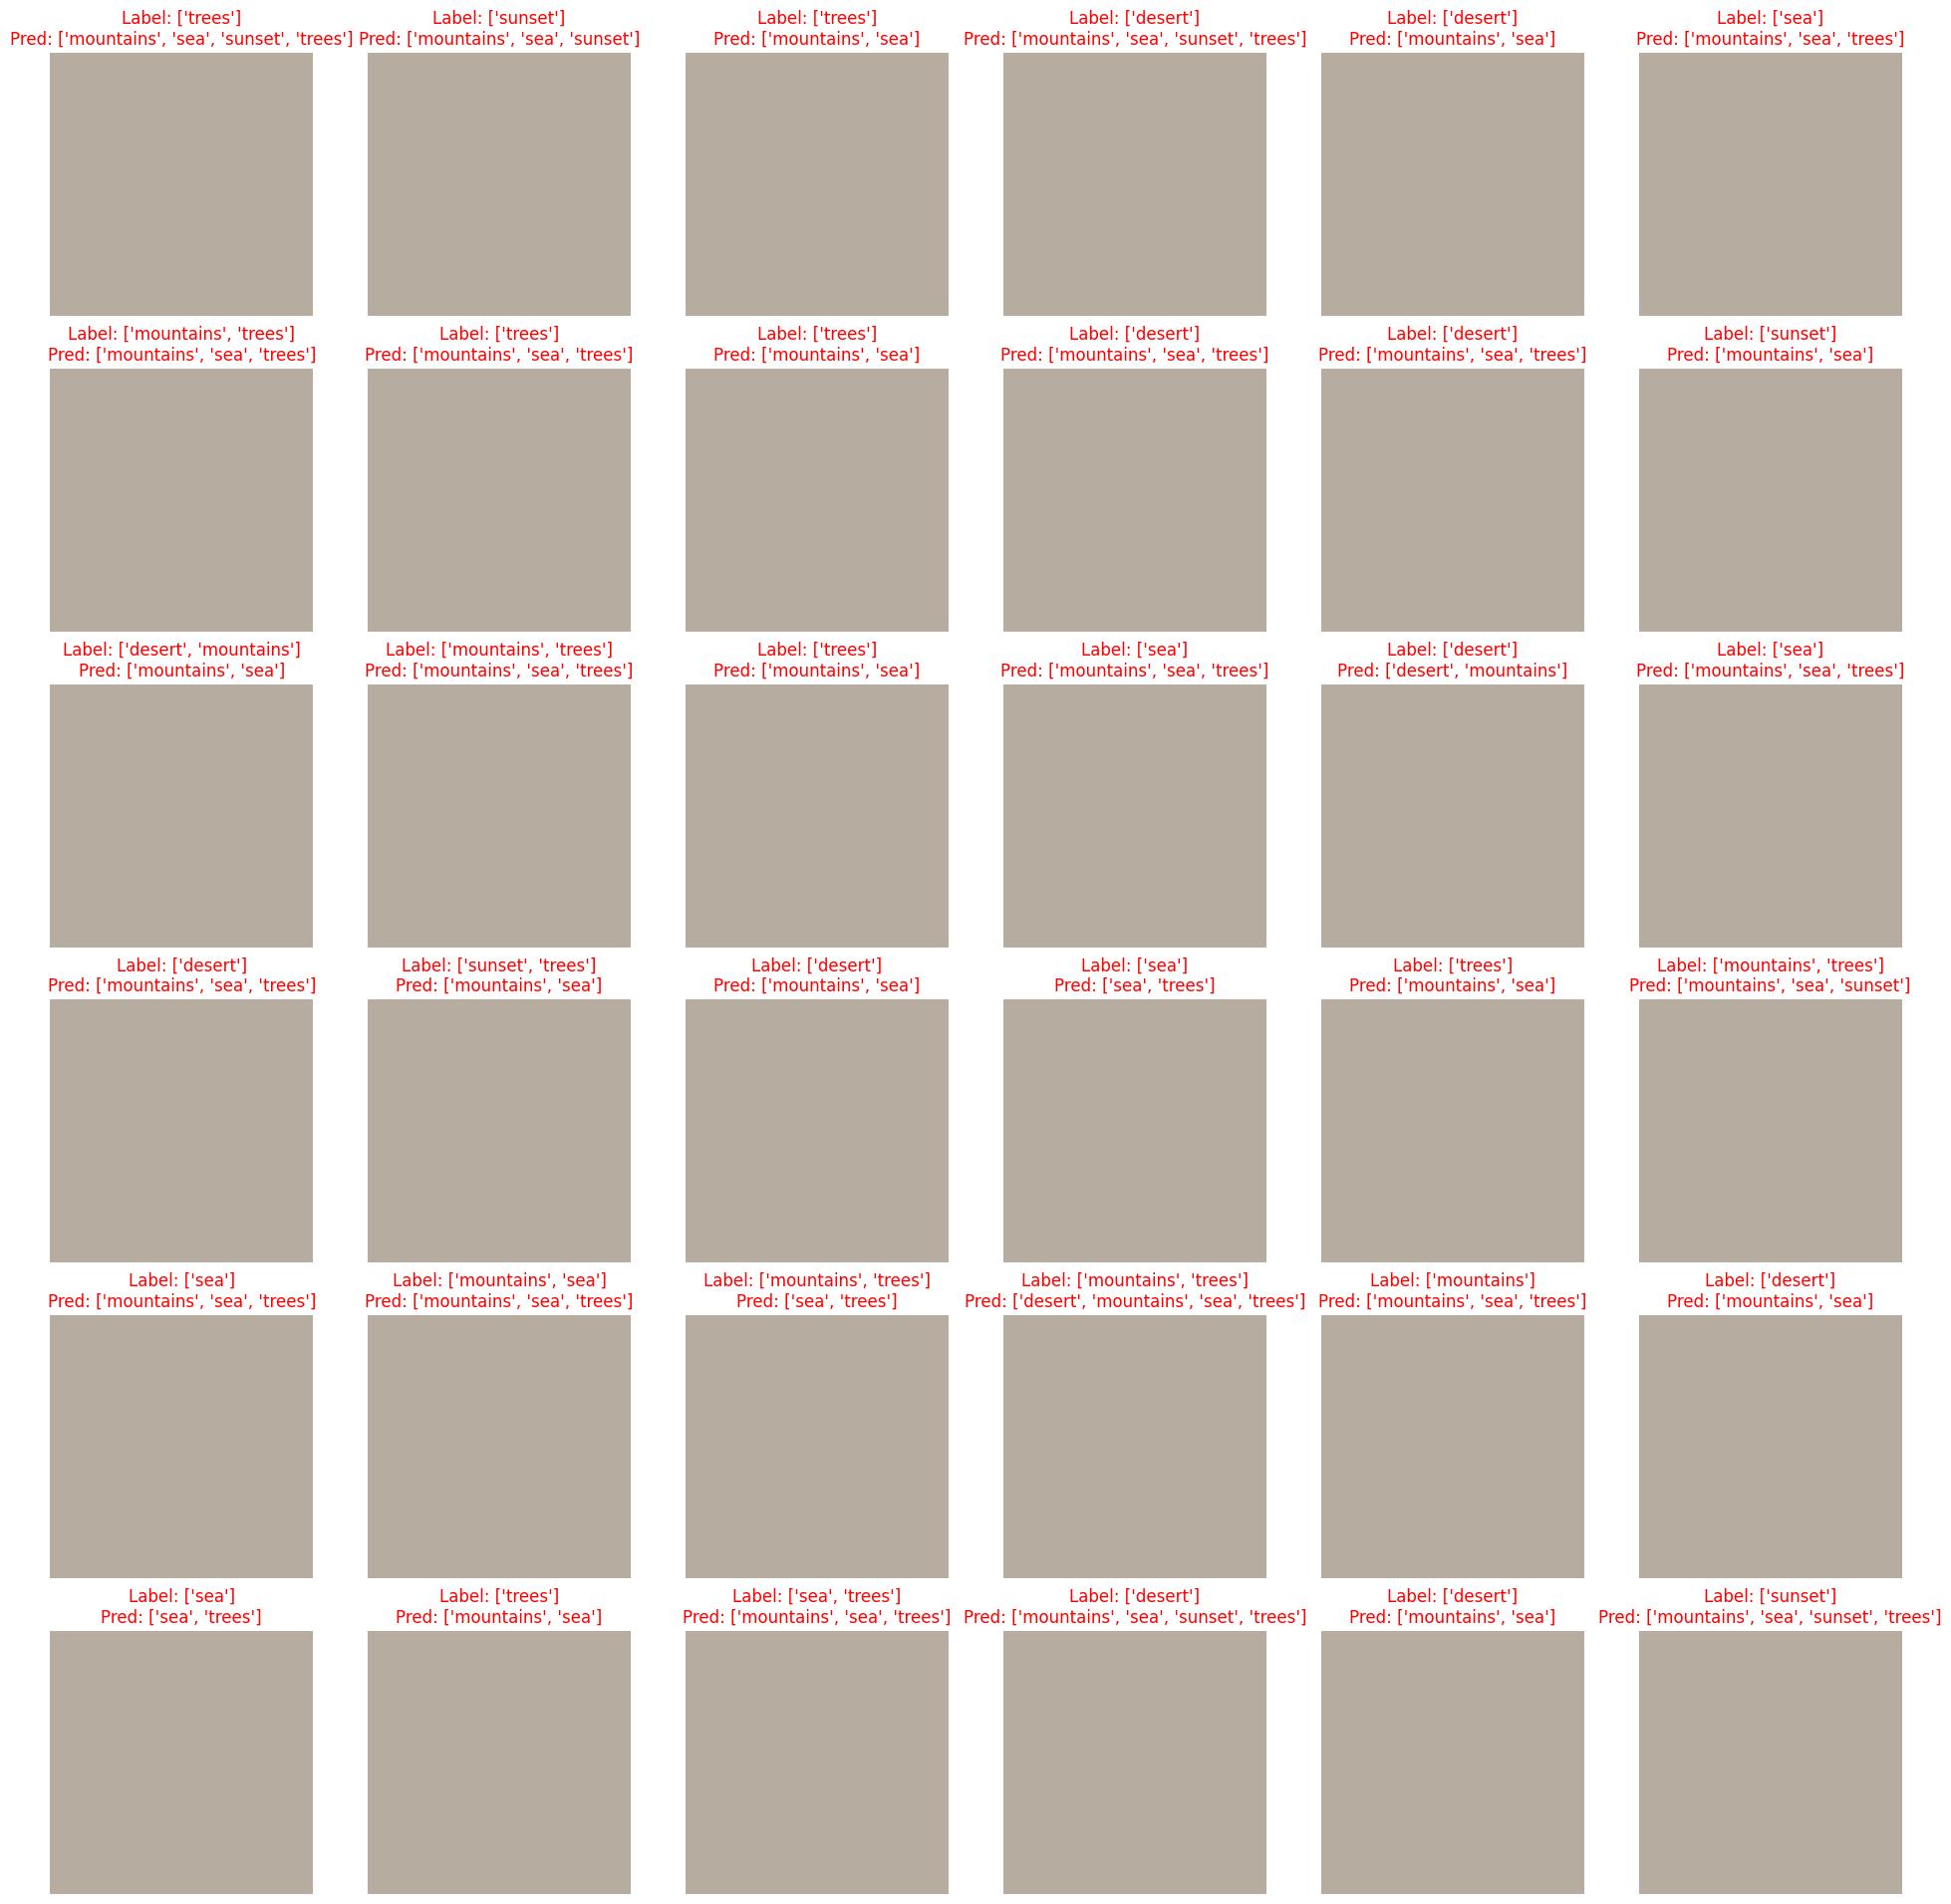

In [86]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(inverse_norm(img).permute(1, 2, 0).cpu())  # Changed permute dimensions
    font = {"color": "r"} if (pred != label).any() else {"color": 'g'}
    label, pred = convert_to_label(label), convert_to_label(pred)
    ax.set_title(f"Label: {label}\nPred: {pred}", fontdict=font)
    ax.axis('off')
